# **Insurance Claims- Fraud Detection**

## **1.Dataset loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## **2.Checking basic details**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.shape

(1000, 40)

Droping unwanted columns

In [181]:
df.drop(['_c39','policy_bind_date','incident_date','incident_location','insured_education_level','insured_occupation','insured_hobbies'],axis=1,inplace=True)

In [21]:
df.shape

(1000, 33)

## **3.EDA**

Separating catagorical and coninuous variable for EDA

In [31]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_state', 'insured_sex', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident']


In [32]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


In [33]:
cont_cols.append('policy_annual_premium')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


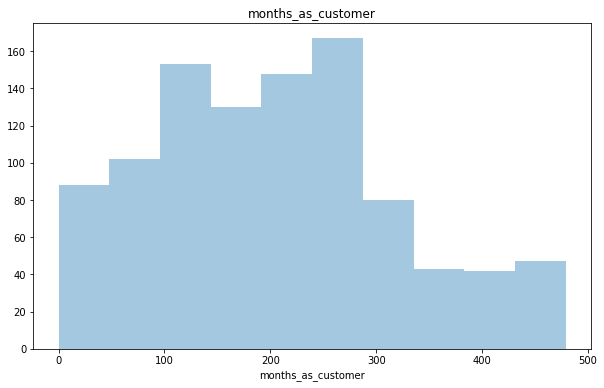

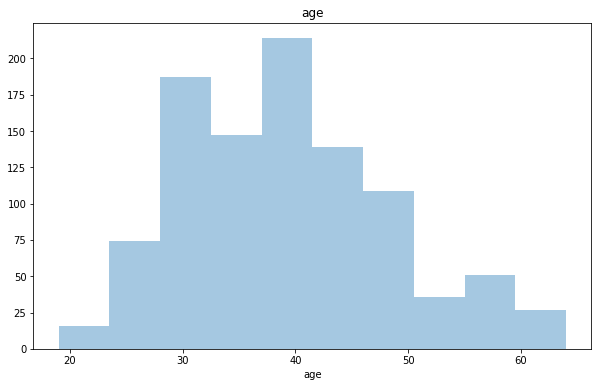

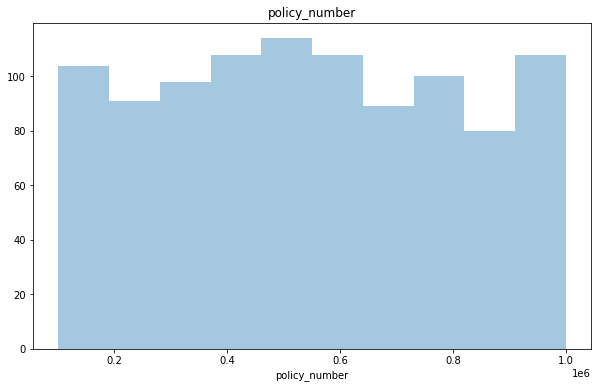

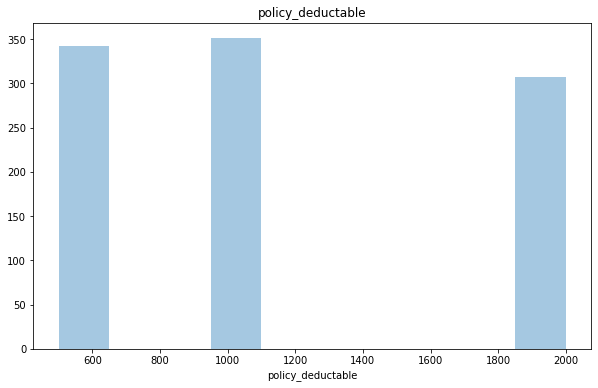

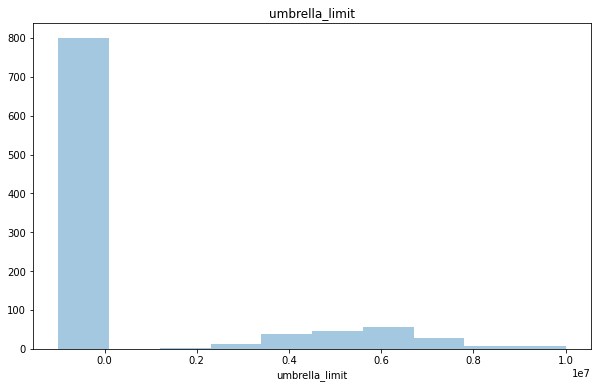

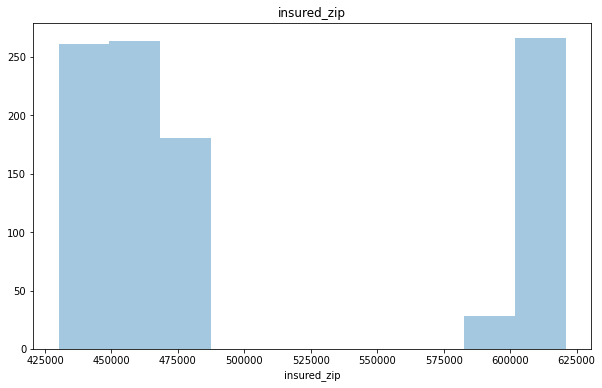

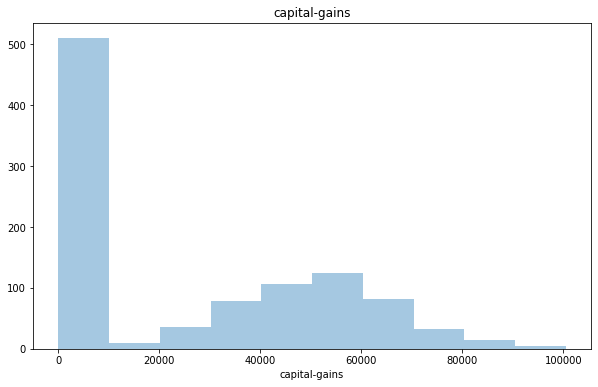

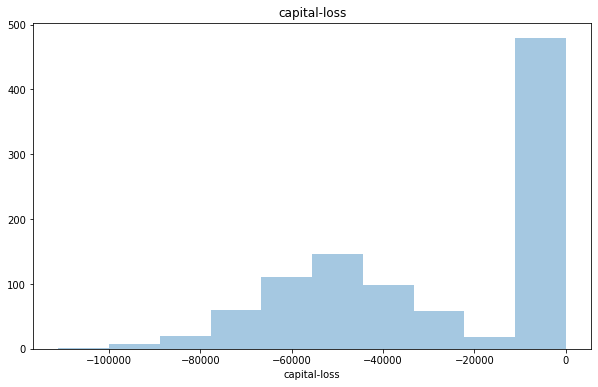

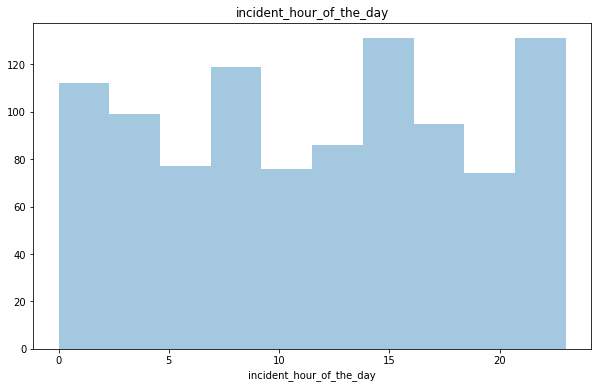

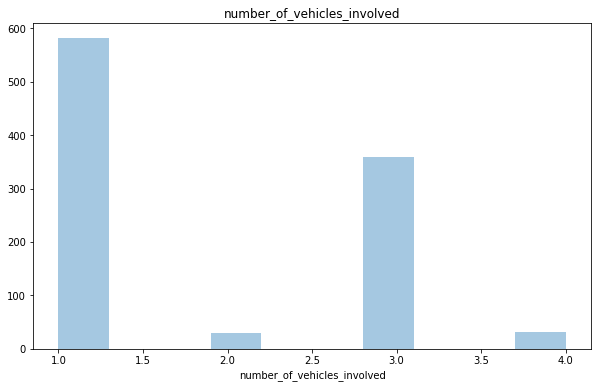

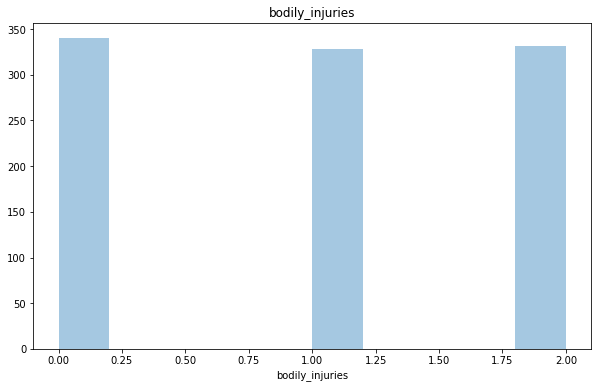

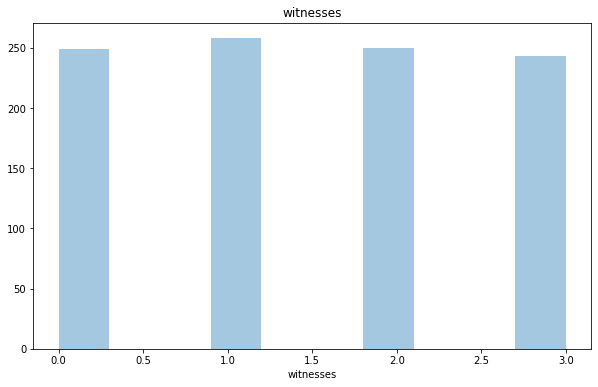

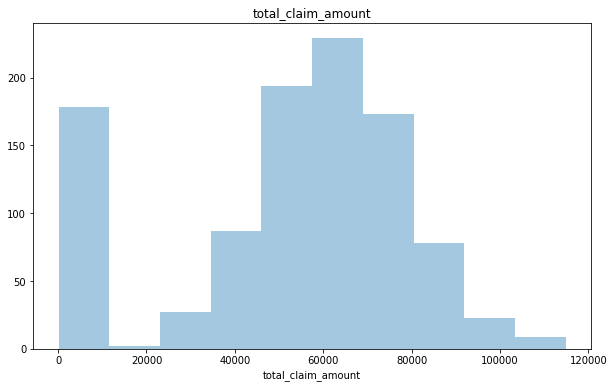

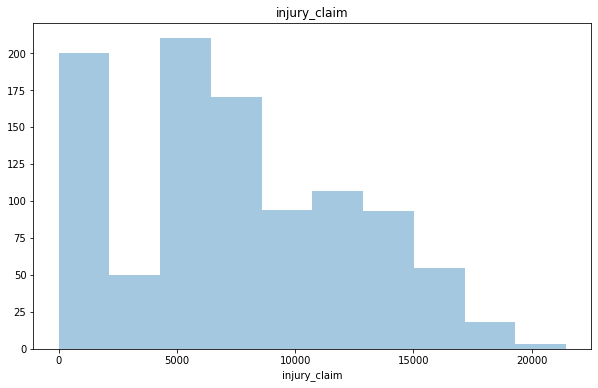

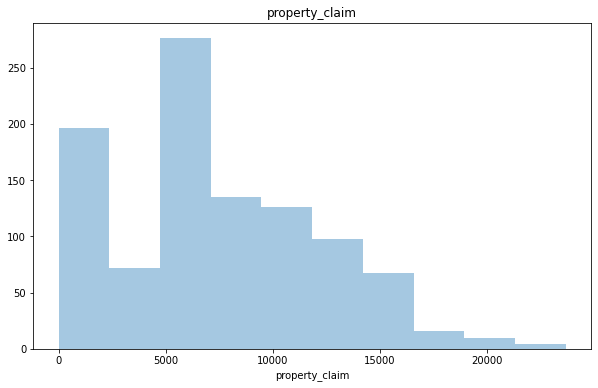

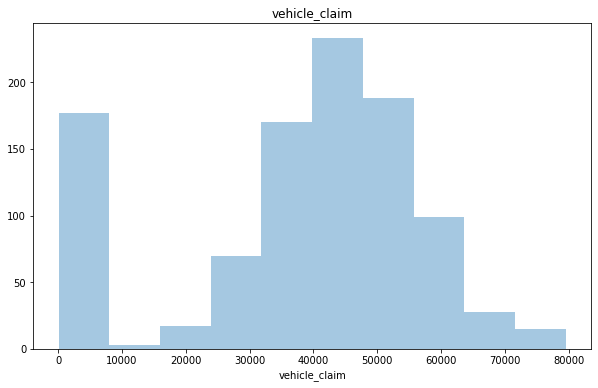

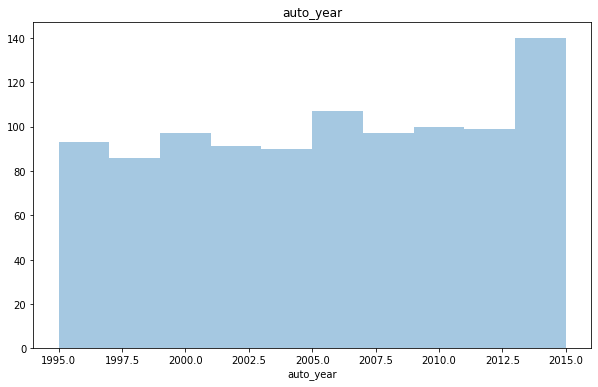

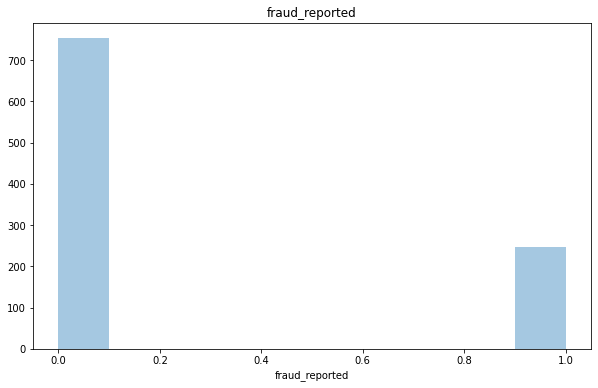

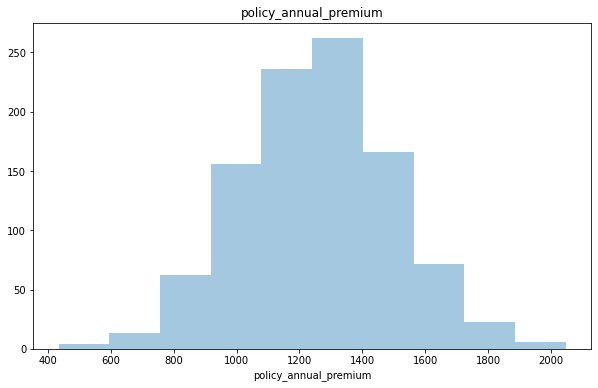

In [34]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (10, 6))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

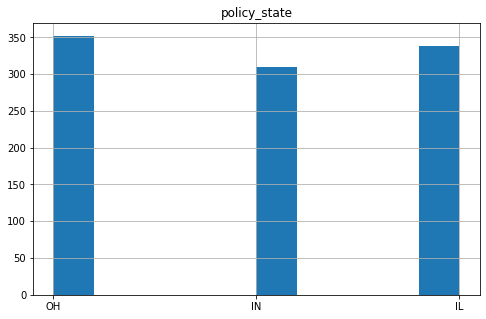

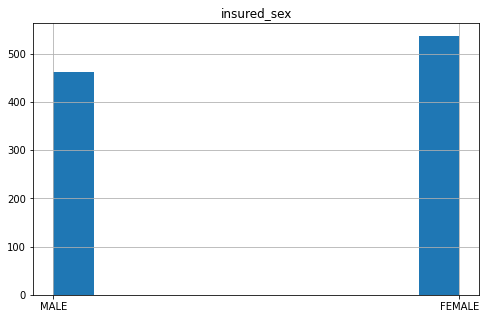

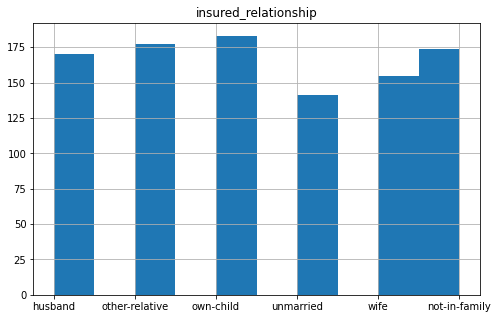

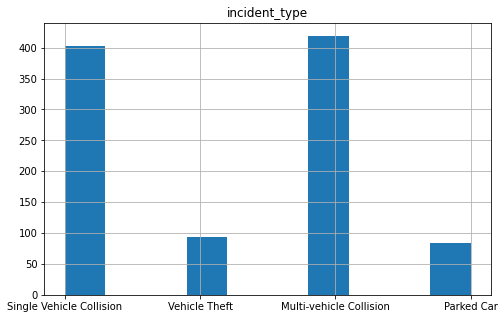

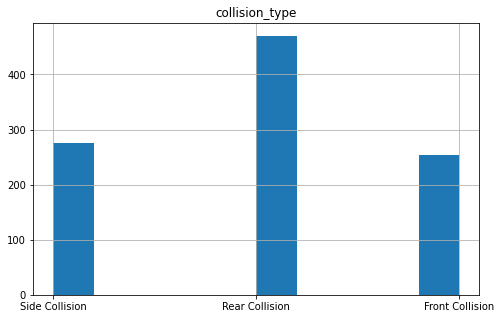

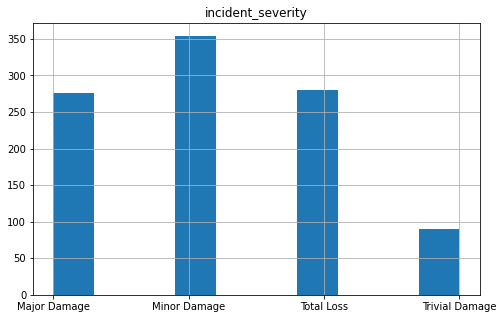

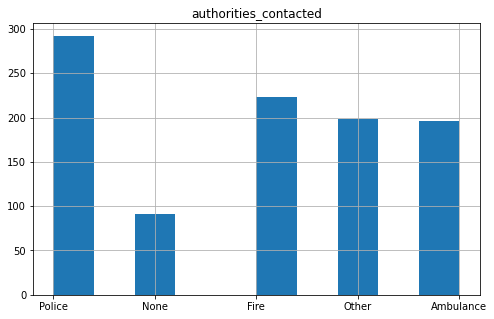

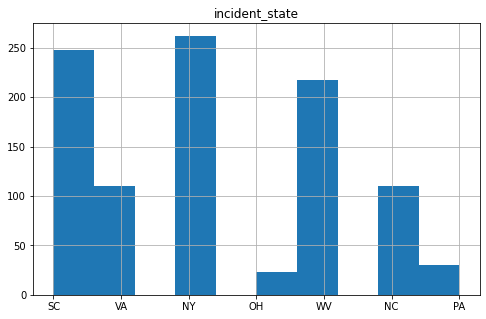

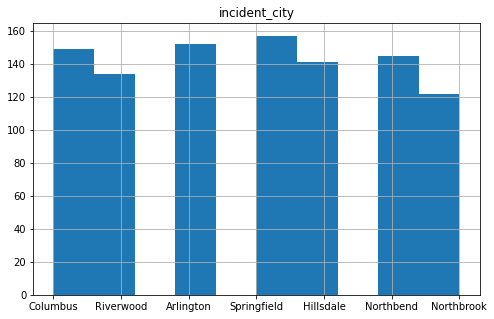

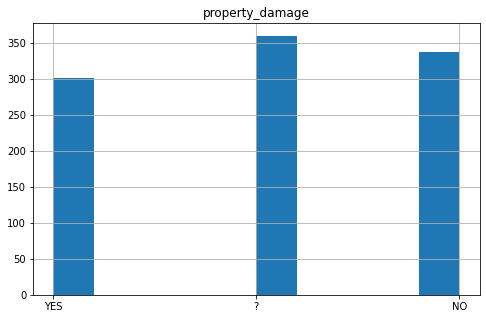

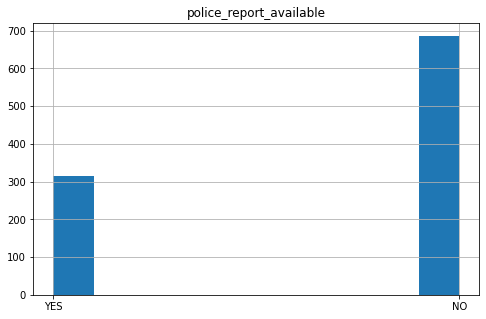

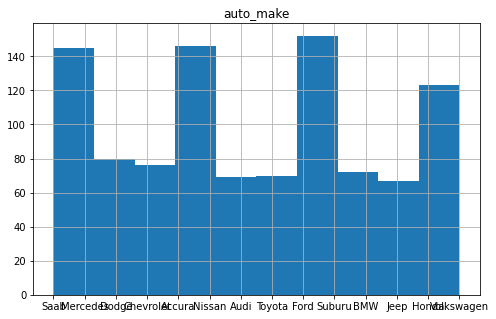

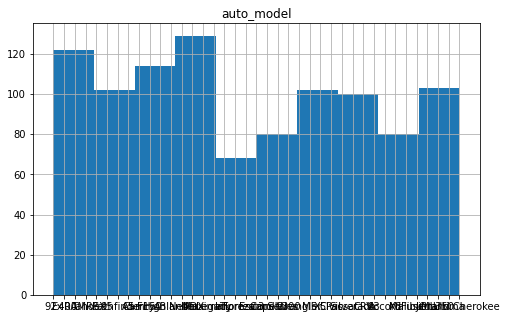

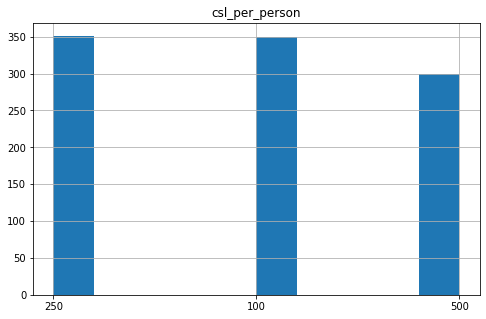

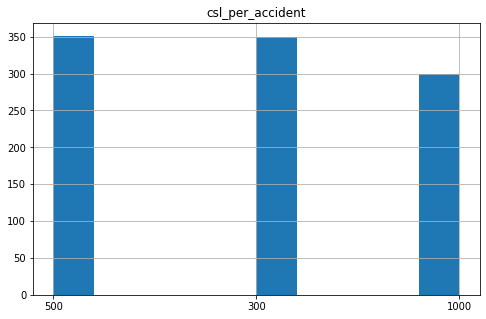

In [43]:
for i in cate_cols:
    plt.figure(figsize = (8, 5))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

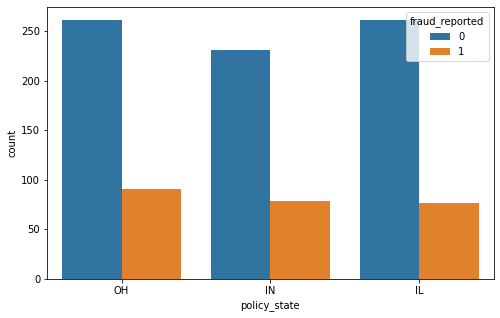

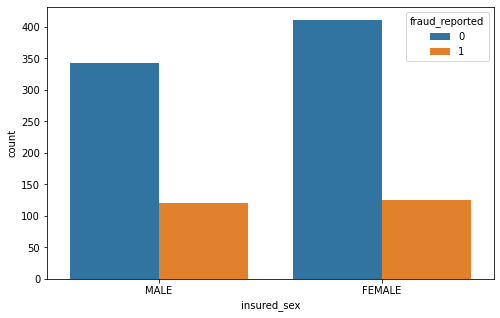

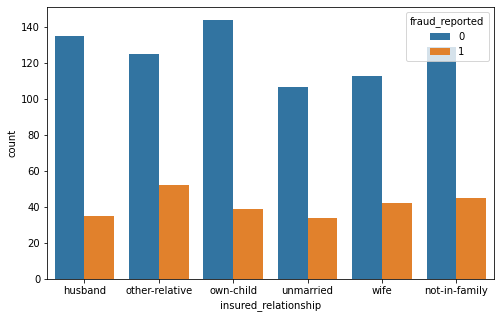

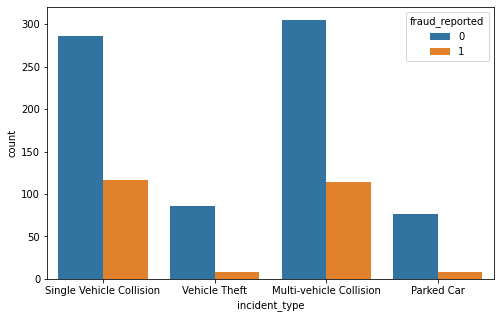

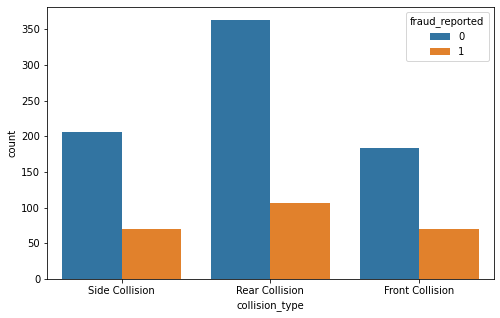

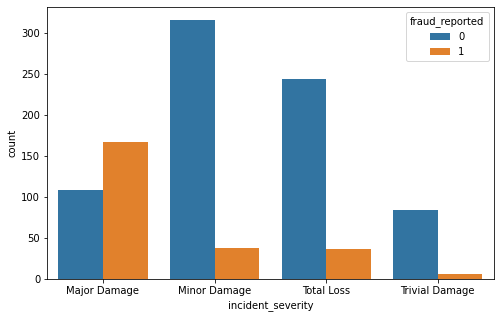

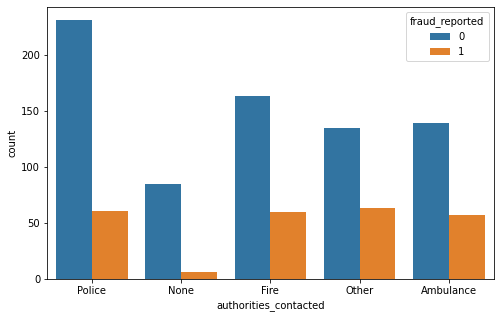

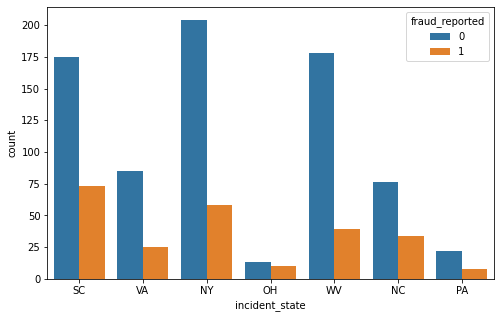

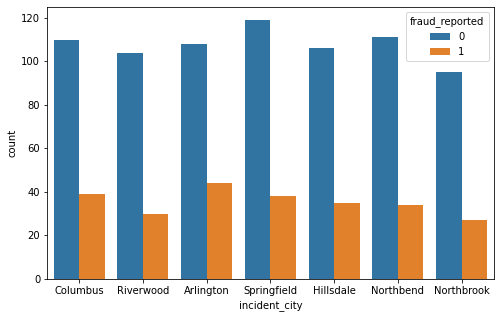

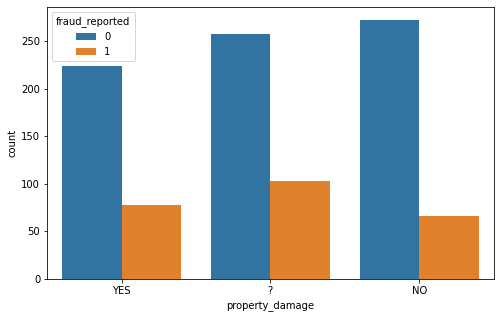

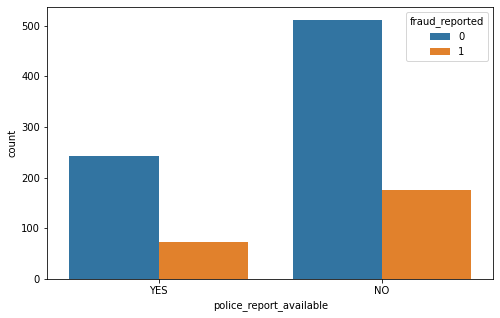

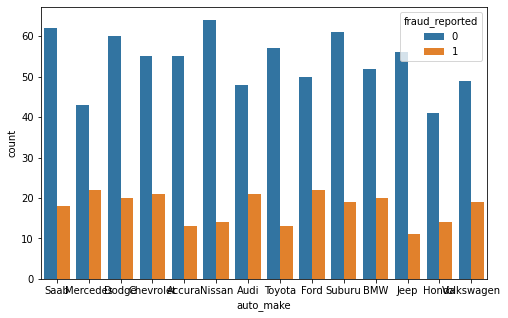

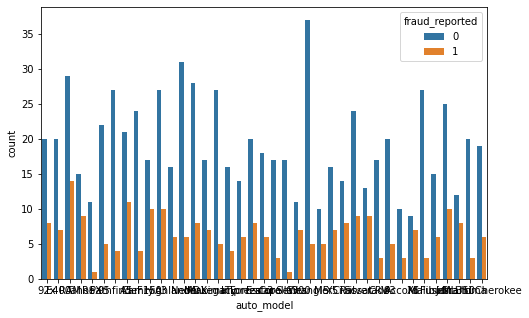

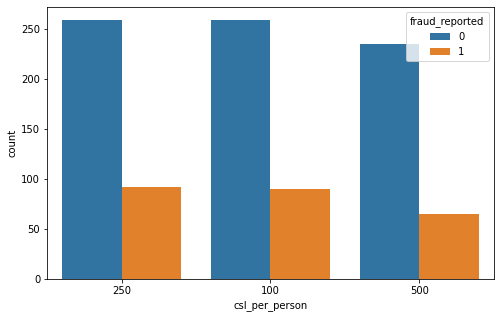

In [44]:
for i in cate_cols[:-1]:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i],hue=df['fraud_reported'])

In [183]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

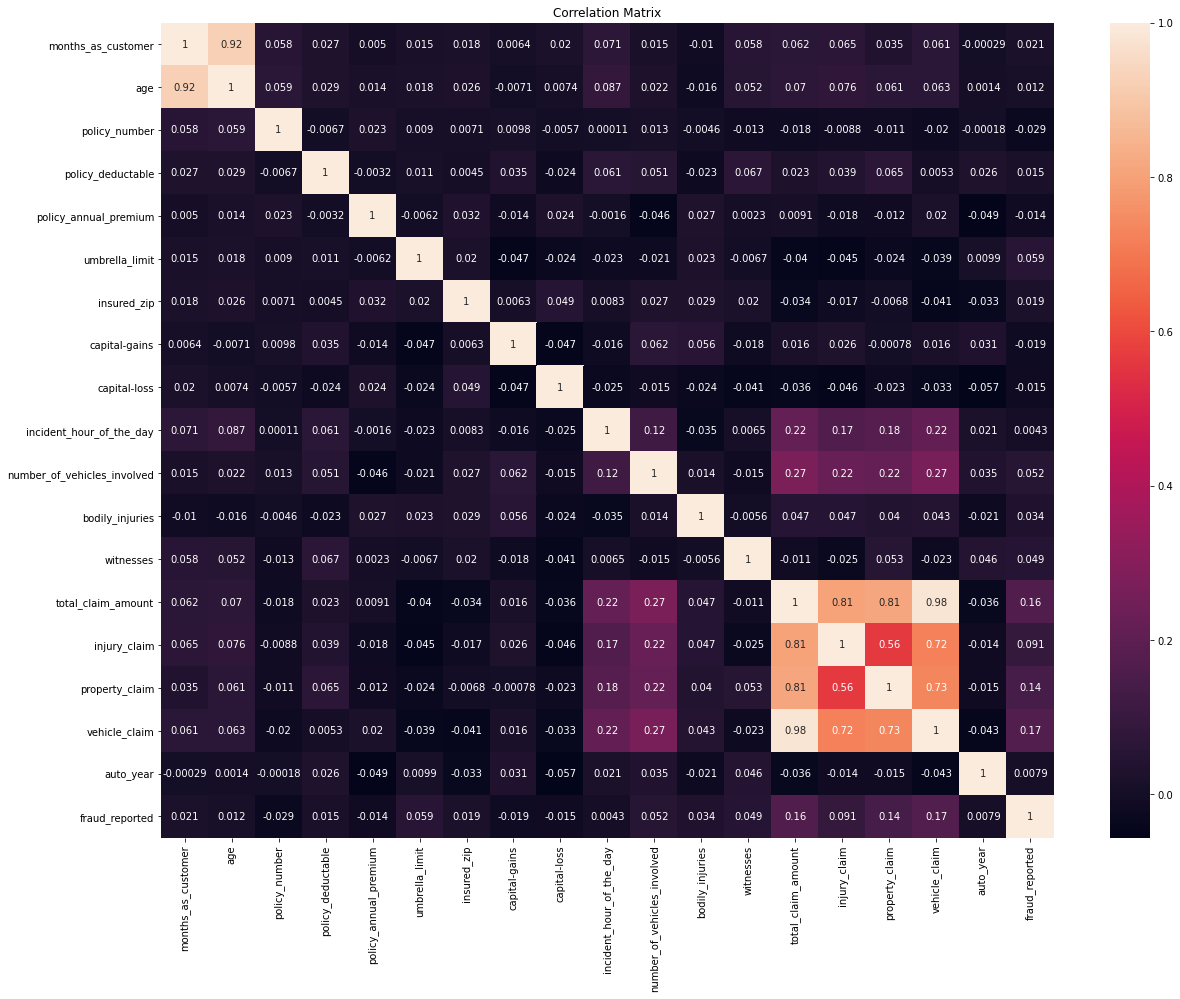

In [45]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

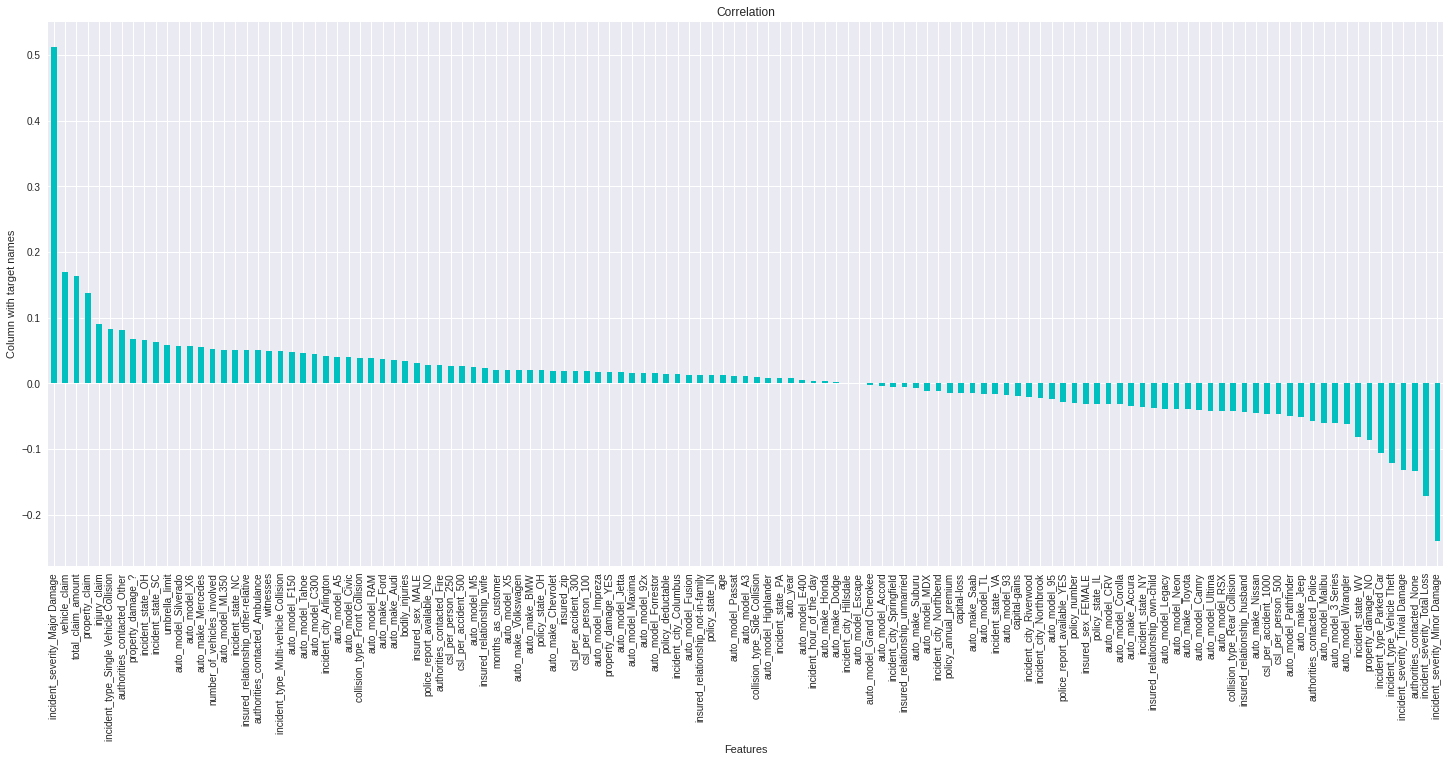

In [179]:
plt.figure(figsize = (25, 10))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [20]:
for i in df.columns:
  my_crosstab = pd.crosstab(index=df["fraud_reported"],columns=df[i],margins=True)
  print(my_crosstab)
  print("___________________________________________________________")

months_as_customer  0  1  2  3  4  5  6  ...  472  473  475  476  478  479   All
fraud_reported                           ...                                    
N                   1  3  2  1  2  2  1  ...    1    0    2    1    1    2   753
Y                   0  0  0  1  1  0  0  ...    0    1    0    0    1    0   247
All                 1  3  2  2  3  2  1  ...    1    1    2    1    2    2  1000

[3 rows x 392 columns]
___________________________________________________________
age             19  20  21  22  23  24  25  ...  59  60  61  62  63  64   All
fraud_reported                              ...                              
N                0   1   6   0   3   8  10  ...   4   5   7   3   1   2   753
Y                1   0   0   1   4   2   4  ...   1   4   3   1   1   0   247
All              1   1   6   1   7  10  14  ...   5   9  10   4   2   2  1000

[3 rows x 47 columns]
___________________________________________________________
policy_number   100804  101421  104594

## **4. Data pre-processing**

Replacing missing values with mode value.

In [184]:
df['collision_type'].replace(['?'],df['collision_type'].mode(),inplace=True)
df['property_damage'].replace(['?'],df['property_damage'].mode(),inplace=True)

In [185]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [186]:
df['police_report_available'].replace(['?'],'NO',inplace=True)

In [187]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [188]:
df.drop(['policy_csl'],axis=1,inplace=True)

In [29]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,500,1000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

Skewness()

In [48]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
csl_per_person                 0.410015
csl_per_accident               0.605587
dtype: float64

There is not much skewness present in data

**One hot encoding**

In [189]:
df=x= pd.get_dummies(df, prefix_sep="_")

In [51]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,...,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [65]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,...,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,0.338000,0.310000,0.352000,0.537000,0.463000,0.170000,0.174000,0.17700,0.18300,0.141000,0.155000,0.419000,0.084000,0.403000,0.094000,0.254000,0.470000,0.27600,0.27600,0.354000,0.280000,...,0.032000,0.013000,0.018000,0.02000,0.028000,0.022000,0.02000,0.027000,0.024000,0.027000,0.028000,0.021000,0.025000,0.022000,0.02000,0.035000,0.032000,0.015000,0.036000,0.02000,0.030000,0.024000,0.037000,0.033000,0.031000,0.043000,0.01200,0.022000,0.02000,0.024000,0.023000,0.04200,0.023000,0.016000,0.349000,0.351000,0.300000,0.300000,0.349000,0.351000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,0.473265,0.462725,0.477833,0.498879,0.498879,0.375821,0.379299,0.38186,0.38686,0.348196,0.362086,0.493642,0.277527,0.490746,0.291975,0.435515,0.499349,0.44724,0.44724,0.478448,0.449224,...,0.176088,0.113331,0.133018,0.14007,0.165055,0.146757,0.14007,0.162164,0.153126,0.162164,0.165055,0.143456,0.156203,0.146757,0.14007,0.183872,0.176088,0.121613,0.186383,0.14007,0.170673,0.153126,0.188856,0.178726,0.173404,0.202959,0.10894,0.146757,0.14007,0.153126,0.149978,0

**Removing outliers**

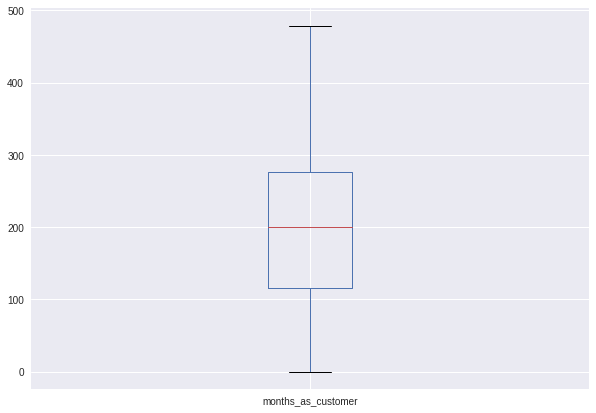

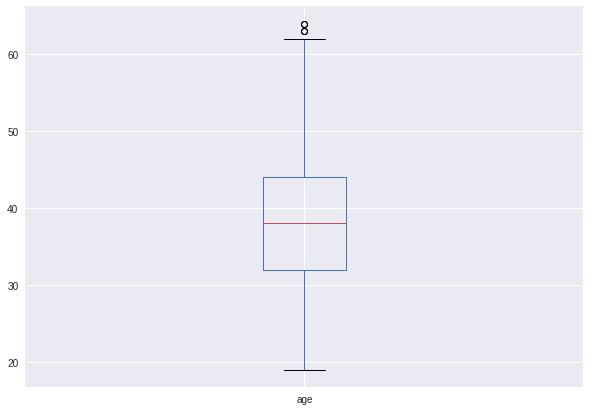

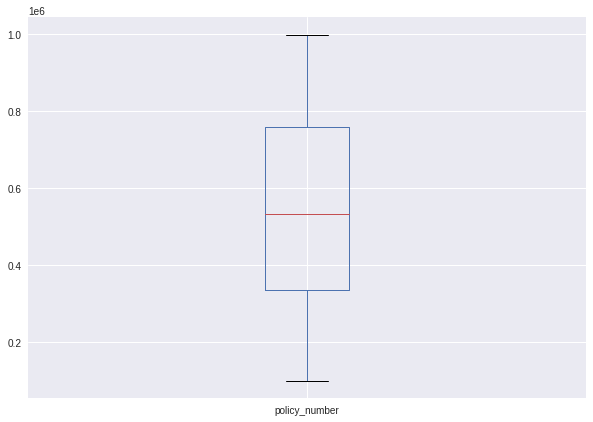

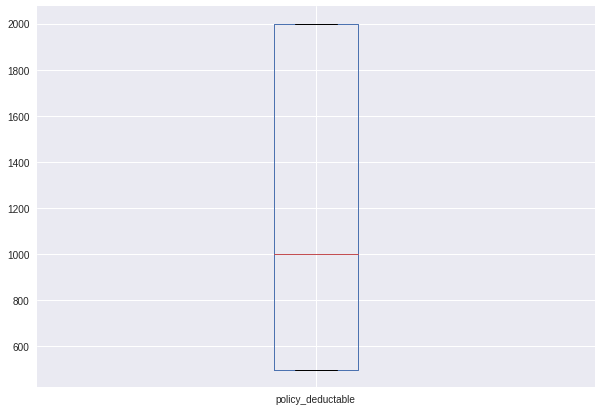

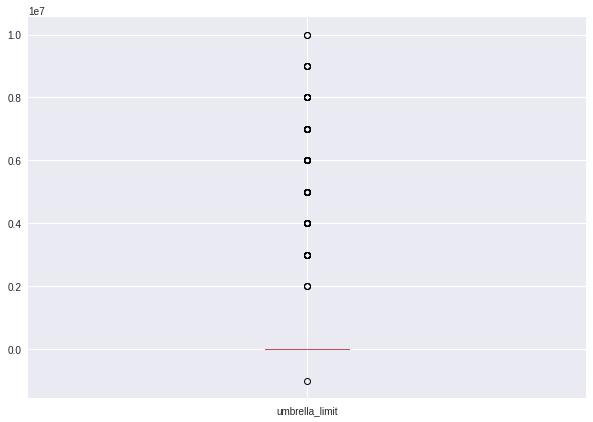

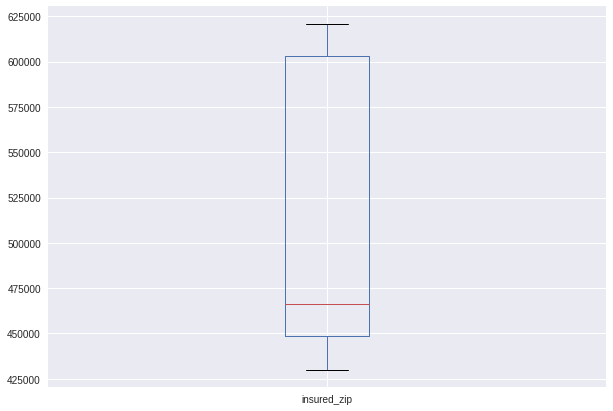

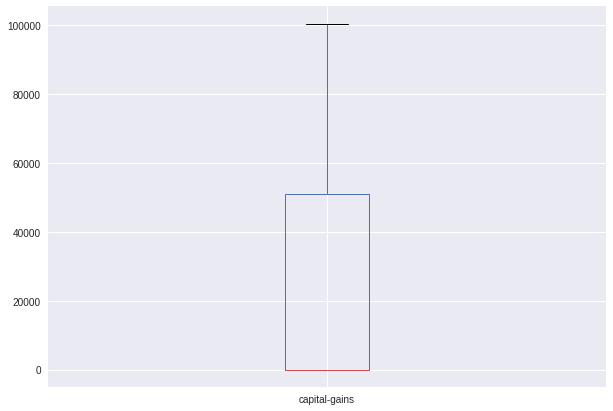

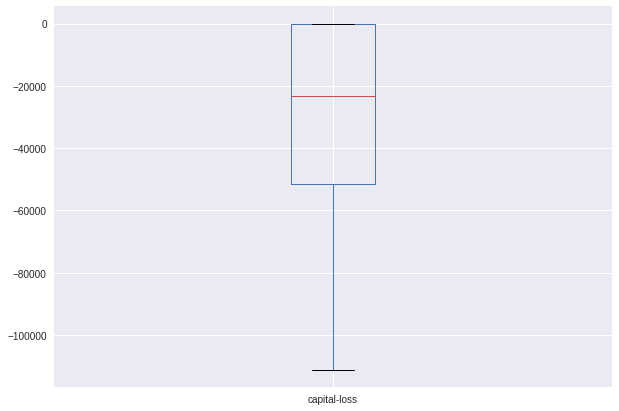

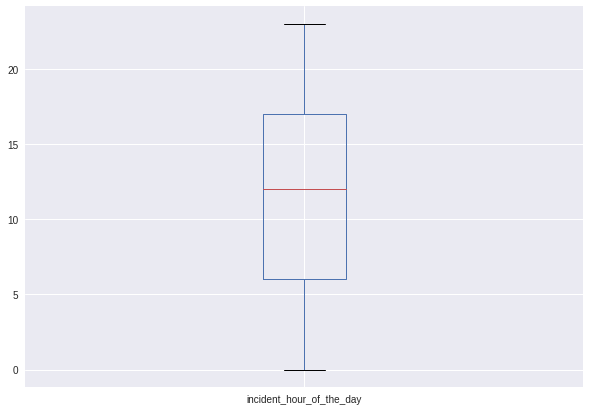

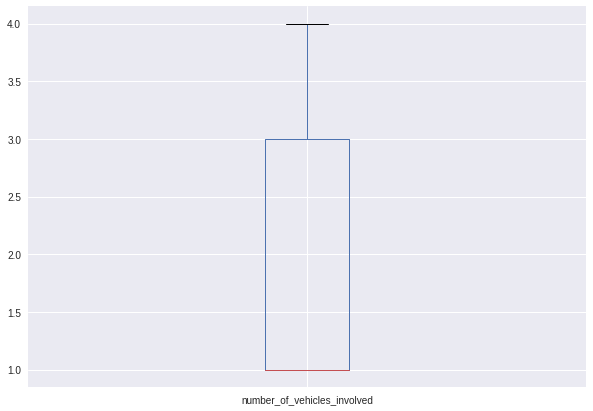

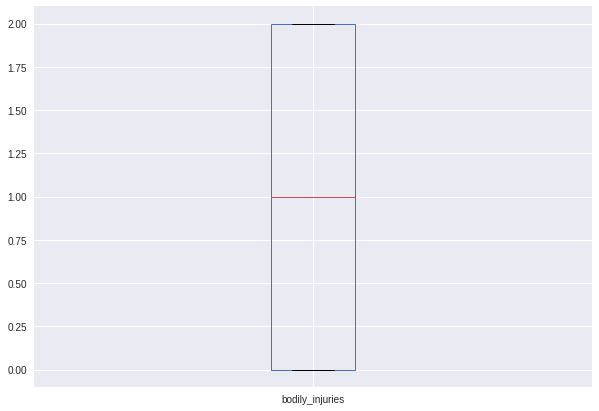

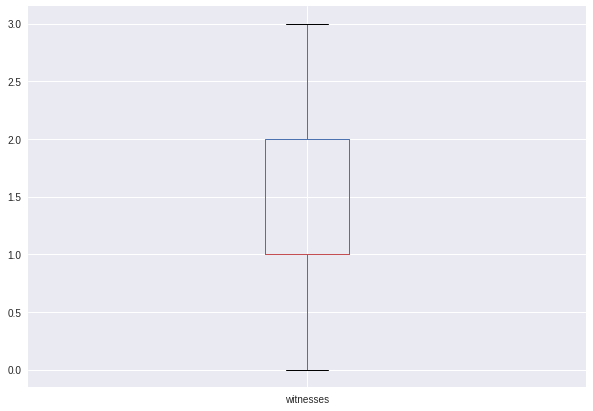

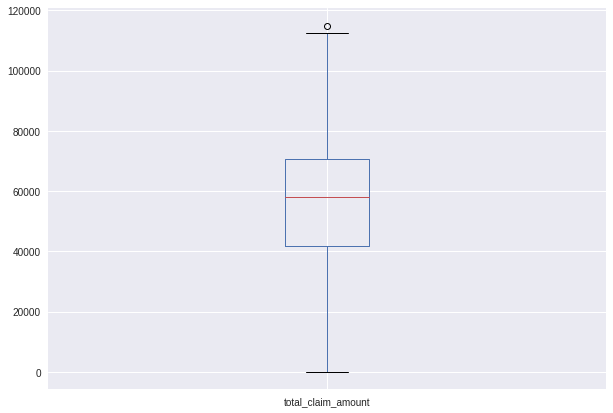

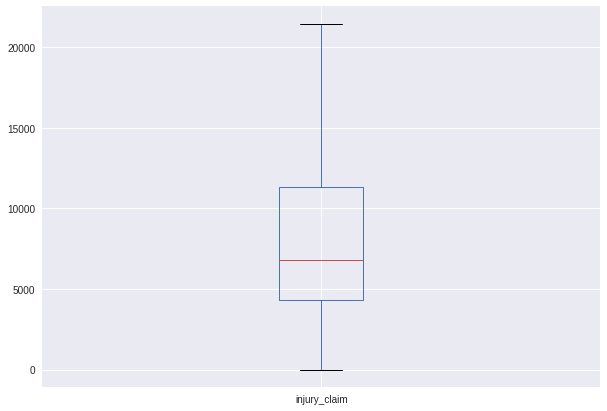

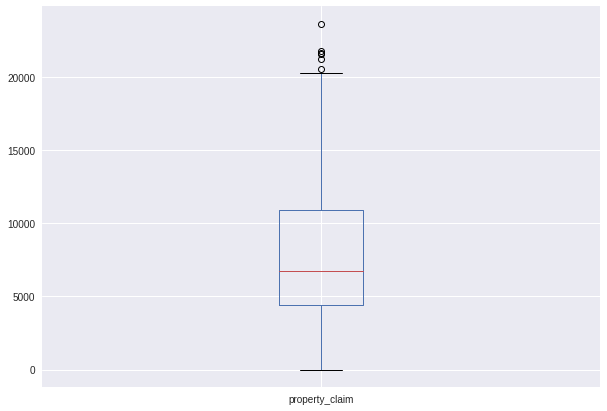

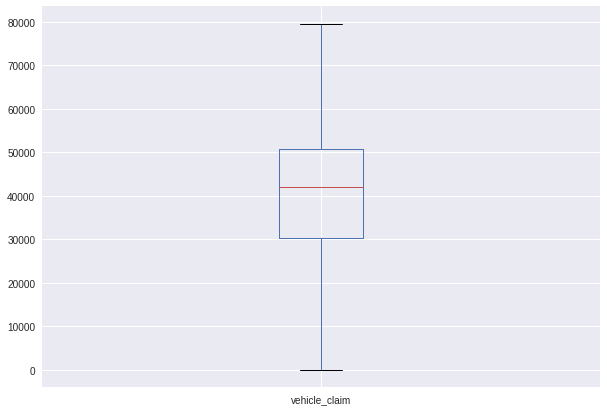

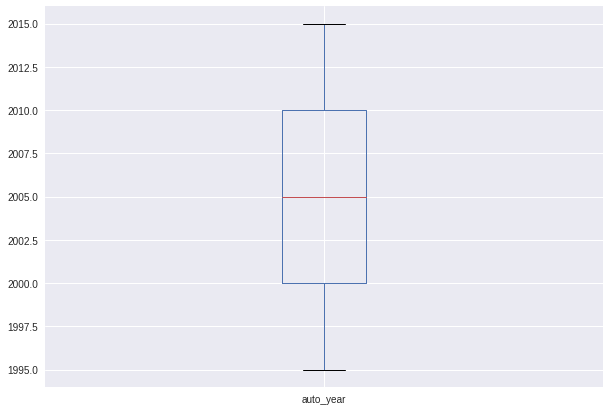

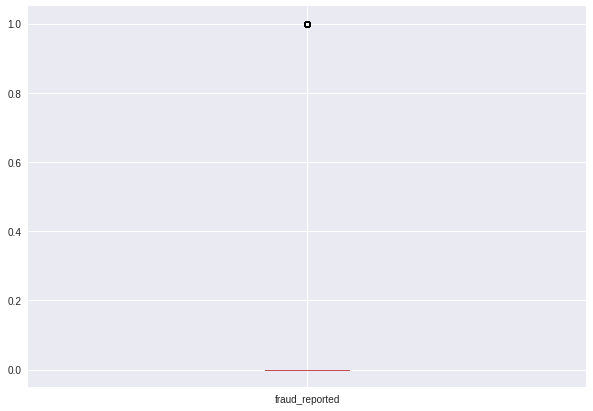

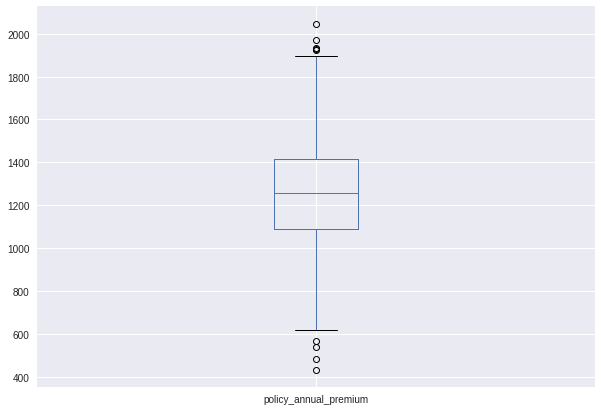

In [178]:
for i in cont_cols:
    plt.figure(figsize = (10, 7))
    df[i].plot.box()

There is no outliers present in the data.still checking if any using Z score methord.

In [60]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (1000, 124)
[[1.07813958 0.99083647 0.09595307 ... 0.65465367 0.73218735 1.35978044]
 [0.2089946  0.33407345 0.79152739 ... 0.65465367 0.73218735 1.35978044]
 [0.60800168 1.08891308 0.55056594 ... 0.65465367 1.36577067 0.73541284]
 ...
 [0.64276748 0.54161057 1.44891961 ... 0.65465367 0.73218735 1.35978044]
 [2.20802805 2.52328351 0.04786687 ... 1.52752523 0.73218735 0.73541284]
 [2.19064515 2.3043625  0.03830297 ... 0.65465367 0.73218735 1.35978044]]


In [61]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   1, ..., 999, 999, 999]), array([75, 80, 33, ..., 31, 73, 91]))


In [62]:
after_zscore = df[(z < 3).all(axis=1)]

In [63]:
after_zscore.shape

(0, 124)

Z score is removing all the rows so this methord is not sugested.

## **5.train test split**

In [190]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### **Finding best Random State**

In [193]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 218


In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=218)

### **Data Imbalence**

In [195]:
print(df['fraud_reported'].value_counts())

0    753
1    247
Name: fraud_reported, dtype: int64


In [196]:
from sklearn.utils import resample

In [197]:
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.fraud_reported==0]
label1=X[X.fraud_reported==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.fraud_reported.value_counts()

1    591
0    591
Name: fraud_reported, dtype: int64

In [198]:
x_train= unsampled.drop(columns='fraud_reported')
y_train= unsampled['fraud_reported']

### **MinMaxScaler**

In [199]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [200]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [201]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.426113,0.440797,0.515568,0.430062,0.508525,0.183818,0.377848,0.239895,0.769326,0.495328,0.297518,0.491117,0.506204,0.465172,0.354469,0.322637,0.483926,0.508291,0.343486,0.329103,0.327411,0.535533,0.464467,0.161591,0.172589,0.194585,0.180203,0.116751,0.174281,0.440778,0.069374,0.404399,0.085448,0.269036,0.444162,0.286802,0.428088,0.269036,0.222504,0.080372,...,0.035533,0.010998,0.016920,0.016920,0.021151,0.018613,0.016920,0.025381,0.022843,0.031303,0.028765,0.022843,0.029611,0.019459,0.026227,0.041455,0.032149,0.018613,0.043993,0.026227,0.026227,0.022843,0.031303,0.036379,0.025381,0.044839,0.008460,0.021151,0.020305,0.028765,0.021151,0.028765,0.026227,0.027919,0.374788,0.348562,0.276650,0.276650,0.374788,0.348562
std,0.246080,0.208856,0.284020,0.413056,0.154662,0.205852,0.373373,0.273483,0.247381,0.298863,0.346665,0.415774,0.371013,0.227309,0.227519,0.201015,0.235509,0.309049,0.475073,0.470086,0.469467,0.498947,0.498947,0.368231,0.378051,0.396049,0.384519,0.321260,0.379511,0.496691,0.254197,0.490983,0.279666,0.443646,0.497083,0.452460,0.495011,0.443646,0.416104,0.271984,...,0.185201,0.104339,0.129028,0.129028,0.143947,0.135209,0.129028,0.157345,0.149465,0.174209,0.167216,0.149465,0.169583,0.138189,0.159877,0.199425,0.176470,0.135209,0.205167,0.159877,0.159877,0.149465,0.174209,0.187311,0.157345,0.207039,0.091628,0.143947,0.141100,0.167216,0.143947,0.167216,0.159877,0.164810,0.484273,0.476717,0.447531,0.447531,0.484273,0.476717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240605,0.266667,0.293311,0.000000,0.404227,0.090909,0.108629,0.000000,0.554455,0.217391,0.000000,0.000000,0.333333,0.378650,0.211189,0.206485,0.399002,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## **6.Model Construction**

### **RandomForestClassifier**

In [254]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
print(randomforest_accu)
print(classification_report(y_test, predRFC))

0.83
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       162
           1       0.56      0.53      0.54        38

    accuracy                           0.83       200
   macro avg       0.72      0.71      0.72       200
weighted avg       0.83      0.83      0.83       200



In [257]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 5).mean()
randomforest_cv

0.763

### **SVC**

In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)

svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.83
[[145  17]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       162
           1       0.55      0.55      0.55        38

    accuracy                           0.83       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.83      0.83      0.83       200



In [205]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 5).mean()
svc_cv

0.7529999999999999

### **DecisionTreeClassifier**

In [206]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.76


,precision,recall,f1-score,support
0,0.856250,0.845679,0.850932,162.00
1,0.375000,0.394737,0.384615,38.00
accuracy,0.760000,0.760000,0.760000,0.76
macro avg,0.615625,0.620208,0.617774,200.00
weighted avg,0.764813,0.760000,0.762332,200.00


In [207]:
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 3).mean()
dtc_cv

0.7049894205582828

### **GaussianNB**

In [208]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.535


,precision,recall,f1-score,support
0,0.887640,0.487654,0.629482,162.000
1,0.252252,0.736842,0.375839,38.000
accuracy,0.535000,0.535000,0.535000,0.535
macro avg,0.569946,0.612248,0.502660,200.000
weighted avg,0.766917,0.535000,0.581290,200.000


In [209]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 3).mean()
gnb_cv

0.6609333884782987

### **KNeighborsClassifier**

In [210]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.64


,precision,recall,f1-score,support
0,0.851562,0.67284,0.751724,162.00
1,0.263889,0.50000,0.345455,38.00
accuracy,0.640000,0.64000,0.640000,0.64
macro avg,0.557726,0.58642,0.548589,200.00
weighted avg,0.739905,0.64000,0.674533,200.00


In [211]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 3).mean()
knn_cv

0.683992375609142

In [258]:
print("model                    ","accuracy           ","cv          ","difference")
print("-------------------------------------------------------------------------------------")
print("random forest            ", round(randomforest_accu,2),"            ",round(randomforest_cv,2 ),"               ",round(randomforest_accu-randomforest_cv,2 ))
print("SVC                      ",round(svc_acc,2),"            ",round(svc_cv,2),"               ",round(svc_acc-svc_cv,2 ))
print("gaussian naive bayes     ",round(gnb_acc,2),"           ",round(gnb_cv,2),"               ",round(gnb_acc-gnb_cv,2 ))
print("decission tree classifier",round(dtc_acc,2),"            ",round(dtc_cv,2),"               ",round(dtc_acc-dtc_cv,2 ))
print("KNN                      ",round(knn_acc,2),"            ",round(knn_cv,2),"               ",round(knn_acc-knn_cv,2 ))

model                     accuracy            cv           difference
-------------------------------------------------------------------------------------
random forest             0.83              0.76                 0.07
SVC                       0.83              0.75                 0.08
gaussian naive bayes      0.54             0.66                 -0.13
decission tree classifier 0.76              0.74                 0.02
KNN                       0.64              0.68                 -0.04


Best model choosen for Hyper parameter tuning accoding to Cross Validation and accuracy score is random forest and decission tree classifier.

## **7.Hyper Parameter tuning**

### **DecisionTreeClassifier**

In [213]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [214]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [215]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [216]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [217]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]} 

In [218]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [219]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                      

In [220]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [228]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',max_depth=10,min_samples_leaf= 2, min_samples_split= 2)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.785


In [230]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.7410000000000001

### **RandomForest Classifier**

In [231]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy']}
rf=GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [232]:
rf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [233]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [260]:
clf= RandomForestClassifier(criterion='entropy',max_depth=9,random_state=218).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
print(randomforest_accu)
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))

0.85
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       162
           1       0.63      0.50      0.56        38

    accuracy                           0.85       200
   macro avg       0.76      0.72      0.73       200
weighted avg       0.84      0.85      0.84       200



In [261]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 10).mean()
randomforest_cv

0.776

## **8.Evaluation metrics**

In [262]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [263]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, fianlRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, fianlRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, fianlRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, fianlRFC)
print('F1 score: %f' % f1_rfc)


print("------------------------------------------")
print("Decision Tree")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_dt = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy_dt)
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, pred)
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, pred)
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, pred)
print('F1 score: %f' % f1_dt)

Random Forest
-----------------------------------------
Accuracy: 0.850000
Precision: 0.633333
Recall: 0.500000
F1 score: 0.558824
------------------------------------------
Decision Tree
-----------------------------------------
Accuracy: 0.785000
Precision: 0.435897
Recall: 0.447368
F1 score: 0.441558


**The best model is Random Forest Classifier with 85% accuracy.**

### **AUC ROC curve**

In [264]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [265]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [266]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7190545808966863 0.6627680311890838


**The best model is Random Forest Classifier.**

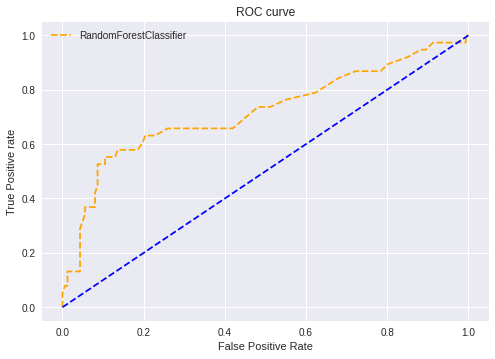

In [268]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## **9.Saving The Model**

In [269]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']